## Probemos a ver qué onda la versión forkeada de dev del glxchop

### Try para la versión up to 24/01/24

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                           AutoMinorLocator)
import h5py
import galaxychop as gchop

## Probamos:

In [34]:
# Una galaxia chiquita:
ID = 664038

# Su .hdf5:
# CAMBIAR SEGÚN EL PATH DONDE ESTÉ EL ARCHIVO
# (el archivo se llama "cutout_664038.hdf5")
part = h5py.File(f'../TNG50/cutouts/Full/cutout_{ID}.hdf5','r')
names = list(part['PartType4'].keys())

#Leemos sus props (y armamos arrays):
h = 0.6774

x_s = part['PartType4']['Coordinates'][:,0] /h
y_s = part['PartType4']['Coordinates'][:,1] /h
z_s = part['PartType4']['Coordinates'][:,2] /h
vx_s = part['PartType4']['Velocities'][:,0]
vy_s = part['PartType4']['Velocities'][:,1]
vz_s = part['PartType4']['Velocities'][:,2]
mass_s = part['PartType4']['Masses'][:] * (1e+10)/h
W_s = part['PartType4']['Potential'][:]

x_dm = part['PartType1']['Coordinates'][:,0] /h
y_dm = part['PartType1']['Coordinates'][:,1] /h
z_dm = part['PartType1']['Coordinates'][:,2] /h
vx_dm = part['PartType1']['Velocities'][:,0]
vy_dm = part['PartType1']['Velocities'][:,1]
vz_dm = part['PartType1']['Velocities'][:,2]
mass_dm = np.full(len(x_dm),4.5e+5)  # Es así para TNG50-1
W_dm = part['PartType1']['Potential'][:]

x_g = part['PartType0']['Coordinates'][:,0] /h
y_g = part['PartType0']['Coordinates'][:,1] /h
z_g = part['PartType0']['Coordinates'][:,2] /h
vx_g = part['PartType0']['Velocities'][:,0]
vy_g = part['PartType0']['Velocities'][:,1]
vz_g = part['PartType0']['Velocities'][:,2]
mass_g = part['PartType0']['Masses'][:] * (1e+10)/h
W_g = part['PartType0']['Potential'][:]

## Galaxychop:

In [35]:
# Qué darle de comer?
gchop.mkgalaxy?

Signature:
gchop.mkgalaxy(
    m_s: numpy.ndarray,
    x_s: numpy.ndarray,
    y_s: numpy.ndarray,
    z_s: numpy.ndarray,
    vx_s: numpy.ndarray,
    vy_s: numpy.ndarray,
    vz_s: numpy.ndarray,
    m_dm: numpy.ndarray,
    x_dm: numpy.ndarray,
    y_dm: numpy.ndarray,
    z_dm: numpy.ndarray,
    vx_dm: numpy.ndarray,
    vy_dm: numpy.ndarray,
    vz_dm: numpy.ndarray,
    m_g: numpy.ndarray,
    x_g: numpy.ndarray,
    y_g: numpy.ndarray,
    z_g: numpy.ndarray,
    vx_g: numpy.ndarray,
    vy_g: numpy.ndarray,
    vz_g: numpy.ndarray,
    *,
    softening_s: float = 0.0,
    softening_dm: float = 0.0,
    softening_g: float = 0.0,
    potential_s: numpy.ndarray = None,
    potential_dm: numpy.ndarray = None,
    potential_g: numpy.ndarray = None,
)
Docstring:
Galaxy builder.

This function builds a galaxy object from a star,
dark matter and gas ParticleSet.

Parameters
----------
m_s : np.ndarray
    Star masses. Shape: (n,1).
x_s, y_s, z_s : np.ndarray
    Star positions. Shapes

In [36]:
# Por ahora no centremos a mano...
"""x_cm = np.mean(df_parts['x'])
y_cm = np.mean(df_parts['y'])
z_cm = np.mean(df_parts['z'])
vx_cm = np.mean(df_parts['vx'])
vy_cm = np.mean(df_parts['vy'])
vz_cm = np.mean(df_parts['vz'])""";

# Creo la galaxia: 
# (softening = 0. (aunque en esta simu es 0.39 kpc), sin potencial (por ahora)).
gal = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     mass_dm,x_dm,y_dm,z_dm,vx_dm,vy_dm,vz_dm,
                     mass_g,x_g,y_g,z_g,vx_g,vy_g,vz_g) # , 0.,0.,0.,W_s,W_dm,W_g)

In [37]:
gal  # Particle counter y sin potencial => Bien. Veamos su df

<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=False>

In [38]:
aux_glx = gal.to_dataframe() #La paso a dataframe para manejarla
aux_glx  # Ahora lo vemos mejor, pero ni las posiciones ni las velocidades están \
         # acomodadas por el CM => Momento angular_x,y,z extremadamente alto (!)

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,1876.364788,10941.539387,27539.606423,-8.900466,-50.376022,63.396873,0.0,NaN,3318.062744,NaN,2.080995e+06,-3.640710e+05,2.861004e+03
1,stars,0,61607.902344,1876.286774,10941.598796,27539.660348,-17.631023,-54.344379,68.287895,0.0,NaN,3963.700684,NaN,2.243805e+06,-6.136801e+05,9.094594e+04
2,stars,0,51444.574219,1876.338083,10941.567894,27539.588120,-5.091568,-47.009865,73.079422,0.0,NaN,3788.226807,NaN,2.094236e+06,-2.773414e+05,-3.249666e+04
3,stars,0,49572.902344,1876.316562,10941.580608,27539.609009,-18.172131,-49.587101,53.167103,0.0,NaN,2807.923828,NaN,1.947342e+06,-6.002117e+05,1.057907e+05
4,stars,0,47812.937500,1876.352440,10941.652421,27539.571629,-7.128507,-52.525951,74.375496,0.0,NaN,4170.752930,NaN,2.260333e+06,-3.358707e+05,-2.055955e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,1824.032647,10911.410244,27455.238153,-44.066044,-135.860809,151.226273,0.0,NaN,21634.679688,NaN,5.380183e+06,-1.485685e+06,2.330081e+05
626243,gas,2,69618.781250,1823.948888,10906.807322,27450.003313,-35.555679,-134.468277,125.141960,0.0,NaN,17503.216797,NaN,5.056054e+06,-1.204256e+06,1.425357e+05
626244,gas,2,103788.789062,1864.965080,10943.542221,27520.726521,-125.966530,-32.564880,-46.469913,0.0,NaN,9543.745117,NaN,3.876637e+05,-3.380026e+06,1.317788e+06
626245,gas,2,68247.281250,1799.913105,10889.327961,27409.715964,-30.894306,-81.631783,126.590179,0.0,NaN,11821.639648,NaN,3.615986e+06,-1.074655e+06,1.894881e+05


In [39]:
np.mean(aux_glx.vx),np.mean(aux_glx.vy),np.mean(aux_glx.vz)

(-12.764187, -53.2414, 67.022255)

In [40]:
# Probemos a ver qué pasa si la queremos centrar:
# Fijarse de poner "gchop." y completar con el TAB (!) (y así sucesivamente...)
center = gchop.preproc.Centralizer()  # Lo instanciamos
gal = center.transform(gal, with_potential=False)  # Ponemos el keyword
gal

<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=True>

## ¿Por qué se inventa el potential = True, siendo que el potencial nucna lo tocamos? ¿Validations? ¿Init? ¿np.nan vs None?

In [41]:
aux_glx_centered = gal.to_dataframe() #La paso a dataframe para manejarla
aux_glx_centered

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,7.292317,-4.698434,-2.520245,3.863721,2.865379,-3.625381,0.0,NaN,18.141064,NaN,24.255074,16.699906,39.048692
1,stars,0,61607.902344,7.214302,-4.639025,-2.466320,-4.866837,-1.102978,1.265640,0.0,NaN,13.252252,NaN,-8.591634,2.872466,-30.534593
2,stars,0,51444.574219,7.265612,-4.669927,-2.538548,7.672618,6.231537,6.057167,0.0,NaN,67.195198,NaN,-12.467470,-63.486342,81.106499
3,stars,0,49572.902344,7.244091,-4.657214,-2.517659,-5.407944,3.654301,-13.855152,0.0,NaN,117.282501,NaN,73.726686,113.983348,1.286139
4,stars,0,47812.937500,7.279969,-4.585400,-2.555040,5.635680,0.715450,7.353241,0.0,NaN,43.171455,NaN,-31.889549,-67.930752,31.050305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,-45.039824,-34.827577,-86.888515,-31.301857,-82.619408,84.204018,0.0,NaN,7448.044434,NaN,-10111.299590,6512.306013,2630.995737
626243,gas,2,69618.781250,-45.123583,-39.430499,-92.123356,-22.791492,-81.226875,58.119705,0.0,NaN,5247.578613,NaN,-9774.581342,4722.198121,2766.567732
626244,gas,2,103788.789062,-4.107391,-2.695601,-21.400147,-113.202347,20.676521,-113.492172,0.0,NaN,13061.381836,NaN,748.410175,1956.390163,-390.074878
626245,gas,2,68247.281250,-69.159366,-56.909860,-132.410705,-18.130119,-28.390381,59.567924,0.0,NaN,2341.526367,NaN,-7149.192580,6520.301790,931.678199


In [42]:
np.mean(aux_glx_centered.vx),np.mean(aux_glx_centered.vy),np.mean(aux_glx_centered.vz)

(7.485066e-08, 8.49399e-06, -7.722093e-06)

## Fantástico, ya se acomoda por velocidad. Me faltaría lo del potencial pero seguimos...

In [43]:
# No voy a calcular el potencial porque:
# i) son muy lentos los algoritmos implementados; ii) es WIP.
# Lo pongamos a mano (previamente calculado): armamos una new glx...
# (el softening que corresponde)

gal = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     mass_dm,x_dm,y_dm,z_dm,vx_dm,vy_dm,vz_dm,
                     mass_g,x_g,y_g,z_g,vx_g,vy_g,vz_g,
                     softening_s = 0.39, softening_dm = 0.39,
                     softening_g = 0.39, potential_s = W_s,
                     potential_dm = W_dm, potential_g = W_g)
gal

<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=True>

In [44]:
gal.has_potential_, gal.stars, gal.gas

(True,
 <ParticleSet 'STARS', size=41942, softening=0.39, potentials=True>,
 <ParticleSet 'GAS', size=192933, softening=0.39, potentials=True>)

### *Por ahora todo en orden*

In [45]:
aux_glx = gal.to_dataframe() #La paso a dataframe para manejarla
aux_glx

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,1876.364788,10941.539387,27539.606423,-8.900466,-50.376022,63.396873,0.39,-20965.576172,3318.062744,-17647.513672,2.080995e+06,-3.640710e+05,2.861004e+03
1,stars,0,61607.902344,1876.286774,10941.598796,27539.660348,-17.631023,-54.344379,68.287895,0.39,-20910.843750,3963.700684,-16947.142578,2.243805e+06,-6.136801e+05,9.094594e+04
2,stars,0,51444.574219,1876.338083,10941.567894,27539.588120,-5.091568,-47.009865,73.079422,0.39,-20979.847656,3788.226807,-17191.621094,2.094236e+06,-2.773414e+05,-3.249666e+04
3,stars,0,49572.902344,1876.316562,10941.580608,27539.609009,-18.172131,-49.587101,53.167103,0.39,-21010.824219,2807.923828,-18202.900391,1.947342e+06,-6.002117e+05,1.057907e+05
4,stars,0,47812.937500,1876.352440,10941.652421,27539.571629,-7.128507,-52.525951,74.375496,0.39,-20866.636719,4170.752930,-16695.882812,2.260333e+06,-3.358707e+05,-2.055955e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,1824.032647,10911.410244,27455.238153,-44.066044,-135.860809,151.226273,0.39,20277.189453,21634.679688,41911.867188,5.380183e+06,-1.485685e+06,2.330081e+05
626243,gas,2,69618.781250,1823.948888,10906.807322,27450.003313,-35.555679,-134.468277,125.141960,0.39,21090.607422,17503.216797,38593.824219,5.056054e+06,-1.204256e+06,1.425357e+05
626244,gas,2,103788.789062,1864.965080,10943.542221,27520.726521,-125.966530,-32.564880,-46.469913,0.39,10694.756836,9543.745117,20238.501953,3.876637e+05,-3.380026e+06,1.317788e+06
626245,gas,2,68247.281250,1799.913105,10889.327961,27409.715964,-30.894306,-81.631783,126.590179,0.39,24938.363281,11821.639648,36760.003906,3.615986e+06,-1.074655e+06,1.894881e+05


In [46]:
# Vuelvo a probar el centrado:
center = gchop.preproc.Centralizer()
gal = center.transform(gal, with_potential=True)  # Para probar esta otra forma...
aux_glx_pot = gal.to_dataframe() # La paso a dataframe para manejarla
aux_glx_pot

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,0.048225,-0.041221,-0.002586,3.863721,2.865379,-3.625381,0.39,-20965.576172,18.141064,-20947.435547,0.156850,0.164845,0.297449
1,stars,0,61607.902344,-0.029789,0.018188,0.051339,-4.866837,-1.102978,1.265640,0.39,-20910.843750,13.252252,-20897.591797,0.079645,-0.212157,0.121375
2,stars,0,51444.574219,0.021521,-0.012713,-0.020889,7.672618,6.231537,6.057167,0.39,-20979.847656,67.195198,-20912.652344,0.053163,-0.290631,0.231655
3,stars,0,49572.902344,0.000000,0.000000,0.000000,-5.407944,3.654301,-13.855152,0.39,-21010.824219,117.282501,-20893.541016,-0.000000,0.000000,0.000000
4,stars,0,47812.937500,0.035877,0.071813,-0.037380,5.635680,0.715450,7.353241,0.39,-20866.636719,43.171455,-20823.464844,0.554804,-0.474479,-0.379048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,-52.283915,-30.170364,-84.370856,-31.301857,-82.619408,84.204018,0.39,20277.189453,7448.044434,27725.234375,-9511.135973,7043.480192,3375.277702
626243,gas,2,69618.781250,-52.367674,-34.773286,-89.605696,-22.791492,-81.226875,58.119705,0.39,21090.607422,5247.578613,26338.185547,-9299.403860,5085.841358,3461.127481
626244,gas,2,103788.789062,-11.351482,1.961613,-18.882488,-113.202347,20.676521,-113.492172,0.39,10694.756836,13061.381836,23756.138672,167.796458,849.237551,-12.649987
626245,gas,2,68247.281250,-76.403458,-52.252647,-129.893045,-18.130119,-28.390381,59.567924,0.39,24938.363281,2341.526367,27279.890625,-6800.294727,6906.171810,1221.776547


## ¡Ahora le puedo pasar arrays vacíos si es que no tengo dm y/o gas!

In [47]:
gal_onlystars = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     [],[],[],[],[],[],[],[],[],[],[],[],
                     [],[])
gal_onlystars

<Galaxy stars=41942, dark_matter=0, gas=0, potential=False>

## Sigo con la glx con potencial:

In [52]:
gchop.preproc.is_centered??

Signature: gchop.preproc.is_centered(galaxy, *, rtol=1e-05, atol=1e-08)
Source:   
def is_centered(galaxy, *, rtol=1e-05, atol=1e-08):
    """
    Validate if the galaxy is centered.

    Parameters
    ----------
    galaxy : ``Galaxy class`` object
    rtol : float
        Relative tolerance. Default value = 1e-05.
    atol : float
        Absolute tolerance. Default value = 1e-08.

    Returns
    -------
    bool
        True if galaxy is centered respect to the position of the lowest
        potential particle, False otherwise.

    """
    if not galaxy.has_potential_:
        raise ValueError("Galaxy must have the potential energy.")

    # We extract only the needed column to center the galaxy
    # Bruno: ¡Agrego lo de las velocidades!
    df = galaxy.to_dataframe(
        attributes=["x", "y", "z", "vx", "vy", "vz", "potential"]
    )

    # minimum potential index of all particles and we extract data frame row
    minpot_idx = df.potential.argmin()
    min_values = df.iloc[m

In [53]:
#center.checker(gal)  # -> False
center.checker(gal, rtol=1e-3, atol=1e-3)

True

In [54]:
# Alineamos:
align = gchop.preproc.Aligner(r_cut=30) # r_cut = 30 kpc es una medida frecuente (predefinirlo)
gal = align.transform(gal)
aux_glx = gal.to_dataframe() #La paso a dataframe para manejarla
aux_glx

/home/bceliz/glxchop_fork/galaxy-chop/galaxychop/preproc/salign.py:165: UserWarning: Input Galaxy is not centered. Please, center it             with Centralizer.transform(galaxy, with_potential)             or proceed with caution.
  warnings.warn(


,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,-0.044445,-0.031934,-0.032192,2.592368,-0.588959,-5.405080,0.39,-20965.576172,18.141064,-20947.435108,0.153646,-0.323685,0.108961
1,stars,0,61607.902344,0.020197,-0.013161,0.057208,-0.765041,2.820604,4.238326,0.39,-20910.843750,13.252252,-20897.591498,-0.217140,-0.129369,0.046900
2,stars,0,51444.574219,-0.014166,-0.001346,-0.029303,5.688101,-10.061021,-0.900978,0.39,-20979.847656,67.195199,-20912.652458,-0.293603,-0.179441,0.150183
3,stars,0,49572.902344,0.000000,0.000000,0.000000,4.018214,13.088543,-6.863600,0.39,-21010.824219,117.282505,-20893.541714,-0.000000,0.000000,0.000000
4,stars,0,47812.937500,0.069171,-0.005300,-0.055036,0.325463,-9.133965,1.675612,0.39,-20866.636719,43.171457,-20823.465262,-0.511577,-0.133815,-0.630078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,-26.496412,96.744364,-26.472026,-80.266444,-28.848273,87.299281,0.39,20277.189453,7448.044679,27725.234133,7682.041163,4437.933157,8529.701820
626243,gas,2,69618.781250,-31.082626,100.542501,-30.096700,-79.463568,-17.791998,62.162237,0.39,21090.607422,5247.578767,26338.186188,5714.466328,4323.756715,8542.487949
626244,gas,2,103788.789062,2.739046,20.945775,-6.559312,28.426804,158.801704,-9.833549,0.39,10694.756836,13061.381507,23756.138343,835.658674,-159.525744,-160.456255
626245,gas,2,68247.281250,-46.864433,146.205810,-43.215932,-27.073788,-24.925175,57.695739,0.39,24938.363281,2341.526291,27279.889572,7358.287502,3873.897040,5126.449273


In [62]:
# Hay que recalcular todo, por los momentos angulares...

gal = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     mass_dm,x_dm,y_dm,z_dm,vx_dm,vy_dm,vz_dm,
                     mass_g,x_g,y_g,z_g,vx_g,vy_g,vz_g,
                     softening_s = 0.39, softening_dm = 0.39,
                     softening_g = 0.39, potential_s = W_s,
                     potential_dm = W_dm, potential_g = W_g)

center = gchop.preproc.Centralizer()
align = gchop.preproc.Aligner(r_cut=30)
#align = gchop.preproc.Aligner()  # -> Esto tira problemas; Error al inicializar el r_cut...
gal = center.transform(gal,with_potential=True)  # -> ¡Se lo debería comer como instancia el Centralizer!
gal = align.transform(gal)
aux_glx = gal.to_dataframe() #La paso a dataframe para manejarla
aux_glx

/home/bceliz/glxchop_fork/galaxy-chop/galaxychop/preproc/salign.py:165: UserWarning: Input Galaxy is not centered. Please, center it             with Centralizer.transform(galaxy, with_potential)             or proceed with caution.
  warnings.warn(


,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,-0.044445,-0.031934,-0.032192,2.592368,-0.588959,-5.405080,0.39,-20965.576172,18.141064,-20947.435108,0.153646,-0.323685,0.108961
1,stars,0,61607.902344,0.020197,-0.013161,0.057208,-0.765041,2.820604,4.238326,0.39,-20910.843750,13.252252,-20897.591498,-0.217140,-0.129369,0.046900
2,stars,0,51444.574219,-0.014166,-0.001346,-0.029303,5.688101,-10.061021,-0.900978,0.39,-20979.847656,67.195199,-20912.652458,-0.293603,-0.179441,0.150183
3,stars,0,49572.902344,0.000000,0.000000,0.000000,4.018214,13.088543,-6.863600,0.39,-21010.824219,117.282505,-20893.541714,-0.000000,0.000000,0.000000
4,stars,0,47812.937500,0.069171,-0.005300,-0.055036,0.325463,-9.133965,1.675612,0.39,-20866.636719,43.171457,-20823.465262,-0.511577,-0.133815,-0.630078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,-26.496412,96.744364,-26.472026,-80.266444,-28.848273,87.299281,0.39,20277.189453,7448.044679,27725.234133,7682.041163,4437.933157,8529.701820
626243,gas,2,69618.781250,-31.082626,100.542501,-30.096700,-79.463568,-17.791998,62.162237,0.39,21090.607422,5247.578767,26338.186188,5714.466328,4323.756715,8542.487949
626244,gas,2,103788.789062,2.739046,20.945775,-6.559312,28.426804,158.801704,-9.833549,0.39,10694.756836,13061.381507,23756.138343,835.658674,-159.525744,-160.456255
626245,gas,2,68247.281250,-46.864433,146.205810,-43.215932,-27.073788,-24.925175,57.695739,0.39,24938.363281,2341.526291,27279.889572,7358.287502,3873.897040,5126.449273


## Probemos la descomposición ¡Con la clase DecomposedGlx!

In [64]:
decomp = gchop.models.JThreshold()
decomp_glx = decomp.decompose(gal)
decomp_glx  # Se tarda unos segunditos

<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=True>
<Components length=626247, labels={nan, 'Spheroid', 'Disk'}, probabilities=False, lmap=True>

In [65]:
decomp_glx.galaxy

<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=True>

In [66]:
decomp_glx.components

<Components length=626247, labels={nan, 'Spheroid', 'Disk'}, probabilities=False, lmap=True>

In [68]:
decomp_glx.components.describe()

Particles           Deterministic mass          
              Size  Fraction               Size  Fraction
Spheroid     25029  0.764431       1.491518e+09  0.767757
Disk          7713  0.235569       4.511788e+08  0.232243

## Y listo, tenemos la parte disco y esferoide de la galaxia. No voy a usar los plots de GlxChop, pero veamos qué conseguimos:

### ***Usar un r_cut < 30 porque parece rotarla mal...***

/tmp/ipykernel_12477/2153075785.py:25: RuntimeWarning: divide by zero encountered in log10
  ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
/tmp/ipykernel_12477/2153075785.py:26: RuntimeWarning: divide by zero encountered in log10
  ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))


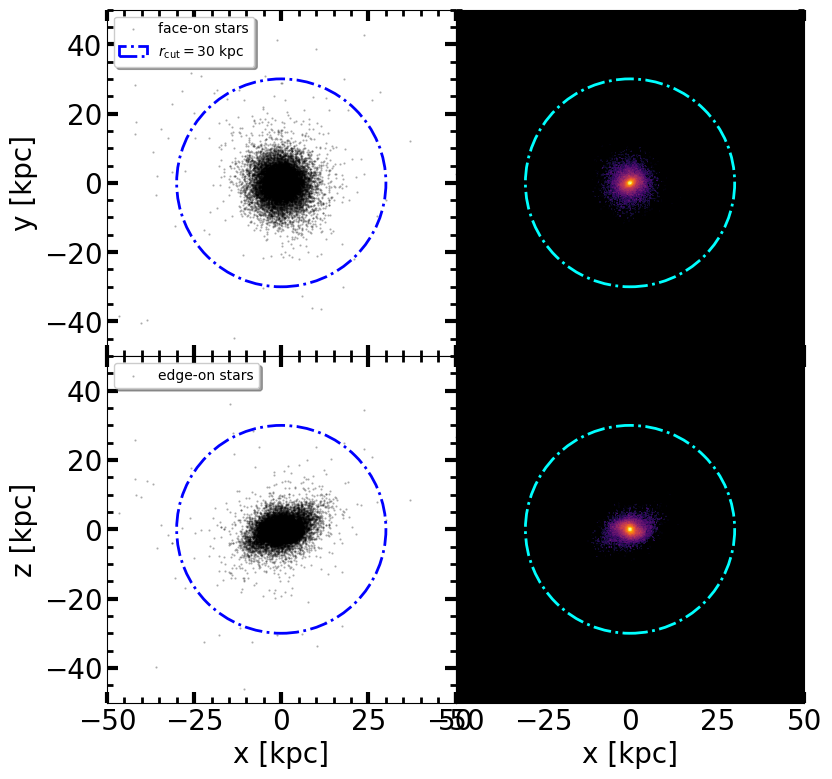

In [84]:
# Plot de la galaxia ya rotada:
# SOLO ESTRELLAS
fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0)
(ax1, ax2),(ax3,ax4)= gs.subplots(sharex=True,sharey=True)

cond = (aux_glx['ptypev'] == 0)

ax1.scatter(aux_glx['x'][cond],aux_glx['y'][cond],c='k',s=0.3,alpha=0.3,label='face-on stars')
ax3.scatter(aux_glx['x'][cond],aux_glx['z'][cond],c='k',s=0.3,alpha=0.3,label='edge-on stars')

kpc_r = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2,label='$r_{\mathrm{cut}} = 30$ kpc')
ax1.add_patch(kpc_r)
kpc_s = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2)
ax3.add_patch(kpc_s)

n = 500 #  Resolución del mapa de color
lim = 50  # kpc

aux_p1 = np.histogram2d(aux_glx['x'][cond],aux_glx['y'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)
aux_p2 = np.histogram2d(aux_glx['x'][cond],aux_glx['z'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)

l = np.linspace(-lim,lim,n)
X,Y = np.meshgrid(l,l)
ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))

kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax2.add_patch(kpc_r)
kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax4.add_patch(kpc_r)

#Settings
ax4.set_xlabel('x [kpc]',size=20)
ax3.set_xlabel('x [kpc]',size=20)
ax3.set_ylabel('z [kpc]',size=20)
ax3.set_ylim(-lim,lim)
ax3.set_xlim(-lim,lim)
ax1.set_ylabel('y [kpc]',size=20)
ax1.set_ylim(-lim,lim)
ax1.set_xlim(-lim,lim)
ax1.tick_params(axis="y", labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax1.legend(loc='upper left',fontsize=10,shadow=True)
ax3.legend(loc='upper left',fontsize=10,shadow=True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax2.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax3.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax4.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax2.set_facecolor("black")
ax4.set_facecolor("black")

plt.show()
plt.close()

# Los warnings son normales...

## Los 30 kpc (círculo dashed-dotted) son mucho más grandes que la glx => muy probablemente esté mal rotada/alineada (por lo gral se usa 2 r_half, pero para este caso no lo consideré como dato -> ¡el smr_crop puede ser útil!)

/tmp/ipykernel_12477/2323849423.py:25: RuntimeWarning: divide by zero encountered in log10
  ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
/tmp/ipykernel_12477/2323849423.py:26: RuntimeWarning: divide by zero encountered in log10
  ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))


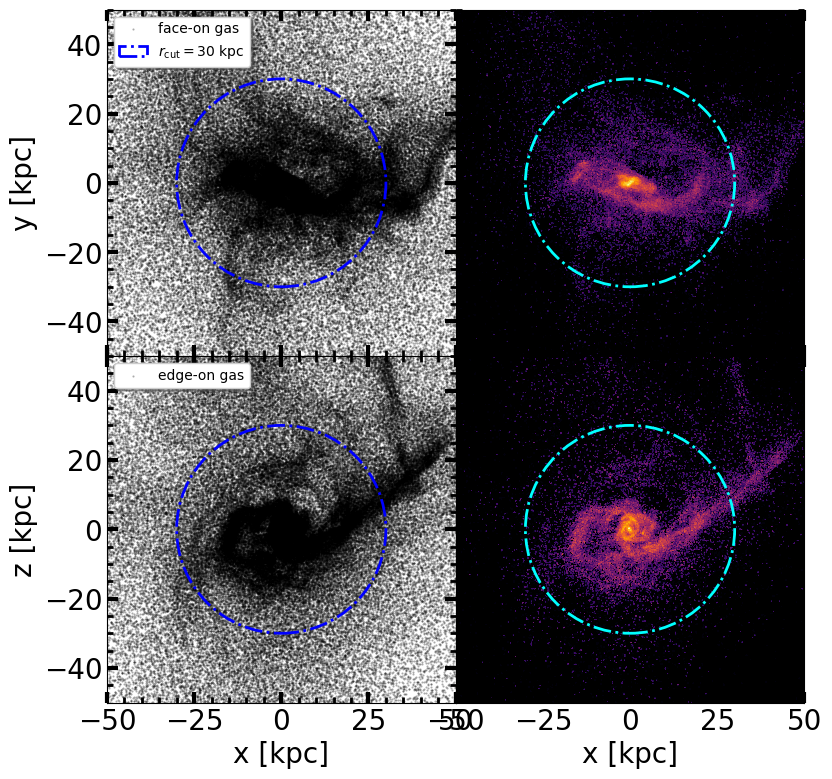

In [87]:
# Plot de la galaxia ya rotada:
# SOLO GAS
fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0)
(ax1, ax2),(ax3,ax4)= gs.subplots(sharex=True,sharey=True)

cond = (aux_glx['ptypev'] == 2)

ax1.scatter(aux_glx['x'][cond],aux_glx['y'][cond],c='k',s=0.3,alpha=0.3,label='face-on gas')
ax3.scatter(aux_glx['x'][cond],aux_glx['z'][cond],c='k',s=0.3,alpha=0.3,label='edge-on gas')

kpc_r = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2,label='$r_{\mathrm{cut}} = 30$ kpc')
ax1.add_patch(kpc_r)
kpc_s = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2)
ax3.add_patch(kpc_s)

n = 500 #  Resolución del mapa de color
lim = 50  # kpc

aux_p1 = np.histogram2d(aux_glx['x'][cond],aux_glx['y'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)
aux_p2 = np.histogram2d(aux_glx['x'][cond],aux_glx['z'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)

l = np.linspace(-lim,lim,n)
X,Y = np.meshgrid(l,l)
ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))

kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax2.add_patch(kpc_r)
kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax4.add_patch(kpc_r)

#Settings
ax4.set_xlabel('x [kpc]',size=20)
ax3.set_xlabel('x [kpc]',size=20)
ax3.set_ylabel('z [kpc]',size=20)
ax3.set_ylim(-lim,lim)
ax3.set_xlim(-lim,lim)
ax1.set_ylabel('y [kpc]',size=20)
ax1.set_ylim(-lim,lim)
ax1.set_xlim(-lim,lim)
ax1.tick_params(axis="y", labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax1.legend(loc='upper left',fontsize=10,shadow=True)
ax3.legend(loc='upper left',fontsize=10,shadow=True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax2.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax3.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax4.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax2.set_facecolor("black")
ax4.set_facecolor("black")

plt.show()
plt.close()

# Los warnings son normales...

## La forma del gas parece decirnos que efectivamente está mal rotada (el edge-on tiene forma de face-on y viceversa)

#### * "edge-on" == "de canto"

/tmp/ipykernel_12477/1268641798.py:25: RuntimeWarning: divide by zero encountered in log10
  ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
/tmp/ipykernel_12477/1268641798.py:26: RuntimeWarning: divide by zero encountered in log10
  ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))


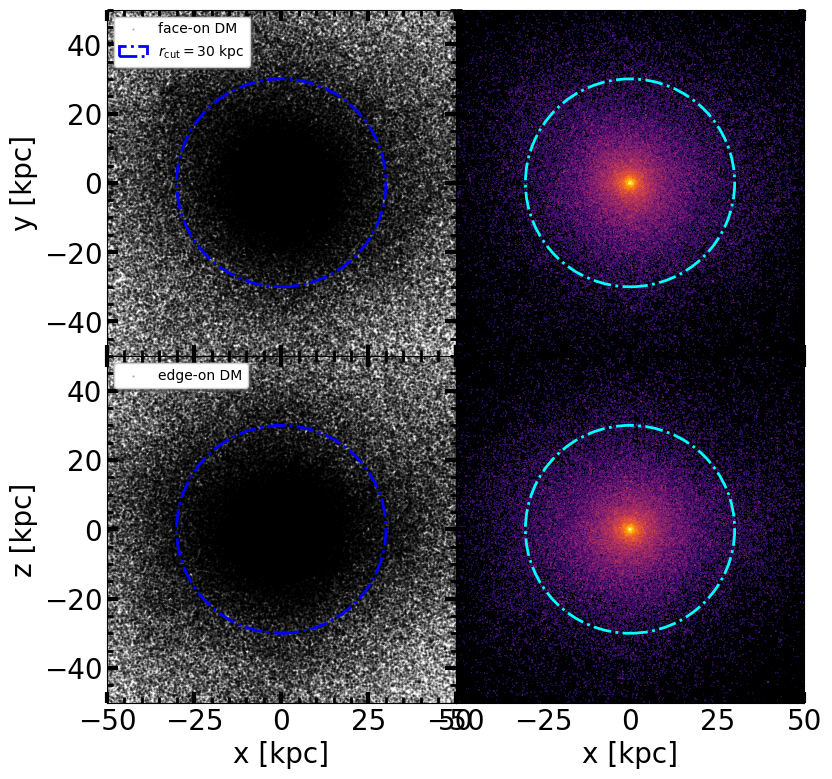

In [88]:
# Plot de la galaxia ya rotada:
# SOLO DM
fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0)
(ax1, ax2),(ax3,ax4)= gs.subplots(sharex=True,sharey=True)

cond = (aux_glx['ptypev'] == 1)

ax1.scatter(aux_glx['x'][cond],aux_glx['y'][cond],c='k',s=0.3,alpha=0.3,label='face-on DM')
ax3.scatter(aux_glx['x'][cond],aux_glx['z'][cond],c='k',s=0.3,alpha=0.3,label='edge-on DM')

kpc_r = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2,label='$r_{\mathrm{cut}} = 30$ kpc')
ax1.add_patch(kpc_r)
kpc_s = plt.Circle((0,0),30,color='b',fill=False,ls='-.',lw=2)
ax3.add_patch(kpc_s)

n = 500 #  Resolución del mapa de color
lim = 50  # kpc

aux_p1 = np.histogram2d(aux_glx['x'][cond],aux_glx['y'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)
aux_p2 = np.histogram2d(aux_glx['x'][cond],aux_glx['z'][cond],bins=np.linspace(-lim,lim,n+1))#,cmin=0,cmax=30)

l = np.linspace(-lim,lim,n)
X,Y = np.meshgrid(l,l)
ax2.contourf(X,Y,np.log10(aux_p1[0].T),levels=30,cmap=plt.get_cmap('inferno'))
ax4.contourf(X,Y,np.log10(aux_p2[0].T),levels=30,cmap=plt.get_cmap('inferno'))

kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax2.add_patch(kpc_r)
kpc_r = plt.Circle((0,0),30,color='cyan',fill=False,ls='-.',lw=2)
ax4.add_patch(kpc_r)

#Settings
ax4.set_xlabel('x [kpc]',size=20)
ax3.set_xlabel('x [kpc]',size=20)
ax3.set_ylabel('z [kpc]',size=20)
ax3.set_ylim(-lim,lim)
ax3.set_xlim(-lim,lim)
ax1.set_ylabel('y [kpc]',size=20)
ax1.set_ylim(-lim,lim)
ax1.set_xlim(-lim,lim)
ax1.tick_params(axis="y", labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax1.legend(loc='upper left',fontsize=10,shadow=True)
ax3.legend(loc='upper left',fontsize=10,shadow=True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax2.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax3.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
ax4.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True);
ax2.set_facecolor("black")
ax4.set_facecolor("black")

plt.show()
plt.close()

# Los warnings son normales...